In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'Diwali_Sales_Data.csv', encoding='unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
###drop the columns which are not required
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
###there are products, whose amount is not known
df.dropna(inplace=True)

In [10]:
pd.isnull(df).sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount'] = df['Amount'].astype(int)

In [13]:
df['Amount'].dtype

dtype('int64')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
df[['Amount', 'Age', 'Marital_Status']].describe()

,Amount,Age,Marital_Status
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,0.420055
std,5222.355168,12.753866,0.493589
min,188.000000,12.000000,0.000000
25%,5443.000000,27.000000,0.000000
50%,8109.000000,33.000000,0.000000
75%,12675.000000,43.000000,1.000000
max,23952.000000,92.000000,1.000000


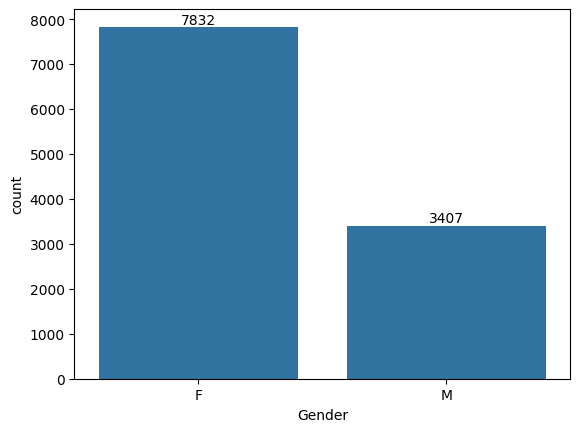

In [17]:
sns_data = sns.countplot(x='Gender', data=df)

for bars in sns_data.containers:
    sns_data.bar_label(bars)  ##counted the exact value on top 

In [18]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

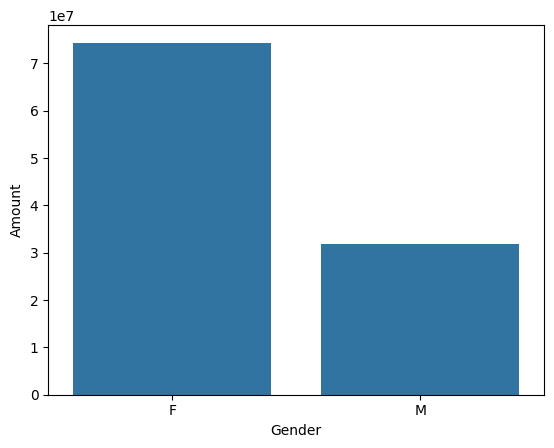

In [19]:
sales_data = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y='Amount', data=sales_data)

In [20]:
### ITS CLEAR THAT MOST OF THE PURCHASES ARE FROM FEMALE SIDE

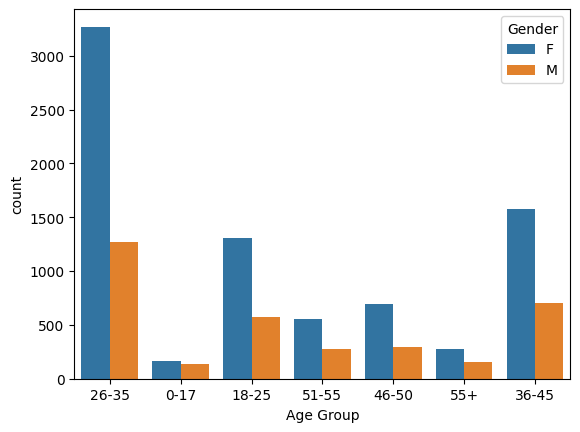

In [21]:
gender_data = sns.countplot(x ='Age Group', hue='Gender', data = df)

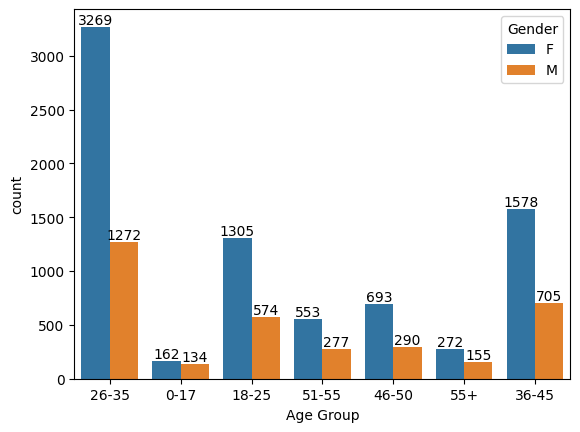

In [22]:
gender_data = sns.countplot(x ='Age Group', hue='Gender', data = df)
#i will get exact count for each bar
for bar in gender_data.containers:
    gender_data.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

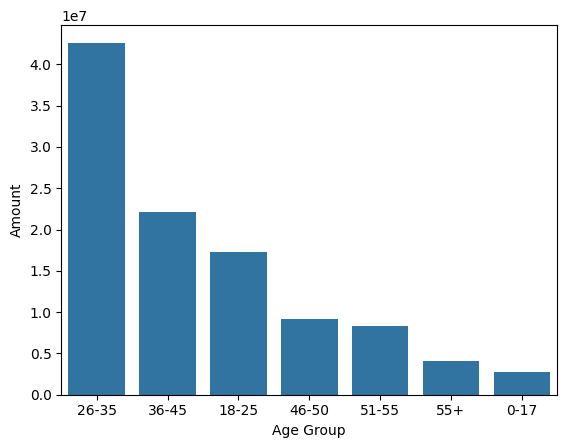

In [23]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group', y='Amount', data=sales_age)

In [ ]:
### FROM ABOVE GRAPH ITS CLEAR, THAT MOST OF THE PURCHASES ARE FROM 26-35 AGE GROUP

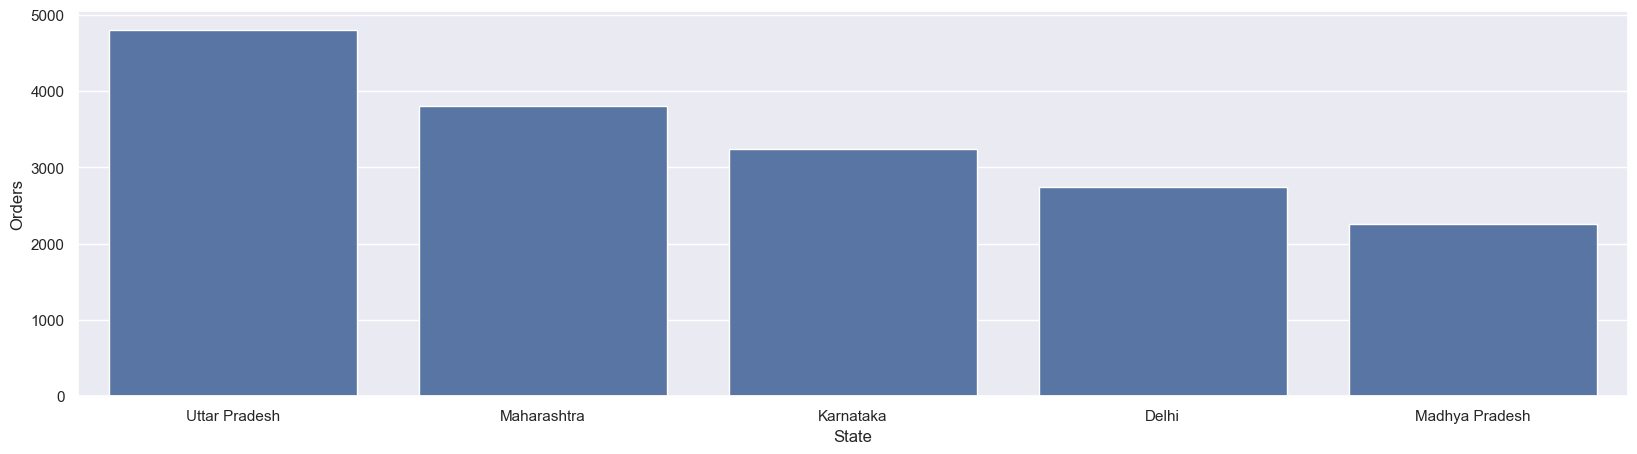

In [26]:
sale_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.barplot(x = 'State', y='Orders', data=sale_state)
sns.set_theme(rc={'figure.figsize':(20,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

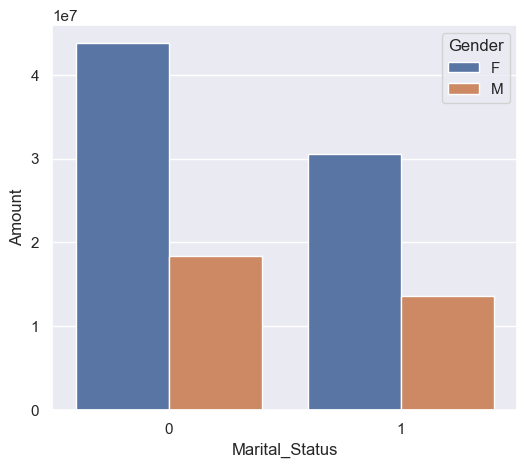

In [29]:
sale_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(6,5)})
sns.barplot(data=sale_state, x='Marital_Status', y='Amount', hue='Gender')

In [ ]:
### MOST OF THE BUYERS ARE MARRIED WOMENS 

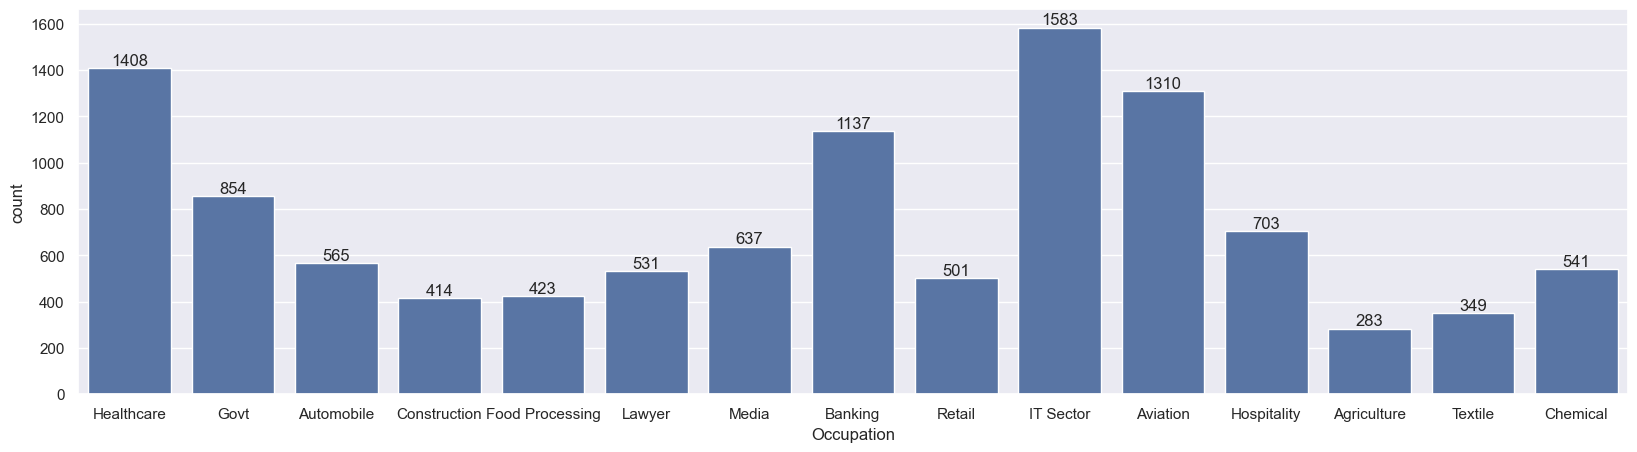

In [33]:
### ANALYSING ON THE BASIS OF OCCUPATION
sns.set_theme(rc={'figure.figsize':(20,5)})
based_on_occ_data= sns.countplot(x='Occupation', data=df)

for bars in based_on_occ_data.containers:
    based_on_occ_data.bar_label(bars)  

<Axes: xlabel='Occupation', ylabel='Amount'>

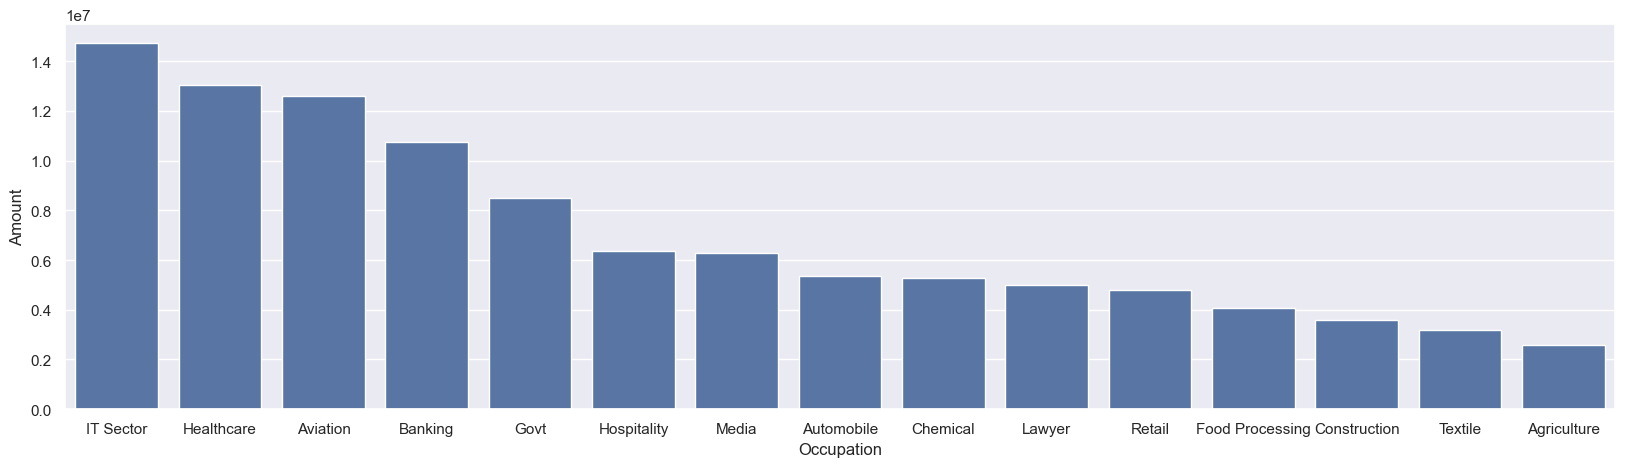

In [35]:
### CREATING BARPLOT 
based_on_occ_data = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data=based_on_occ_data, x='Occupation', y='Amount')

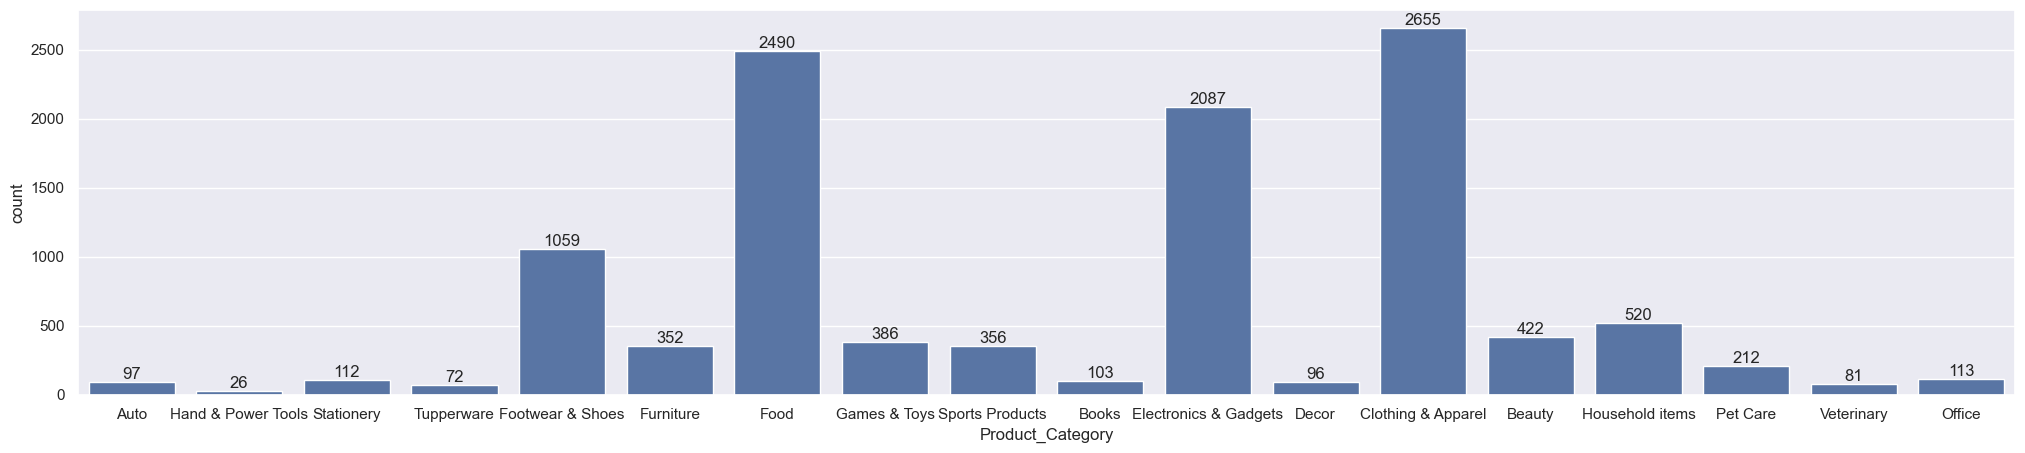

In [41]:
### I NEED TO ANALYSE ON THE BASIS OF PRODUCTS

sns.set_theme(rc={'figure.figsize':(25,5)})
product_data = sns.countplot(x='Product_Category', data=df)

for bars in product_data.containers:
    product_data.bar_label(bars)


### CREATING A BARPLOT FOR SAME


<Axes: xlabel='Product_Category', ylabel='Amount'>

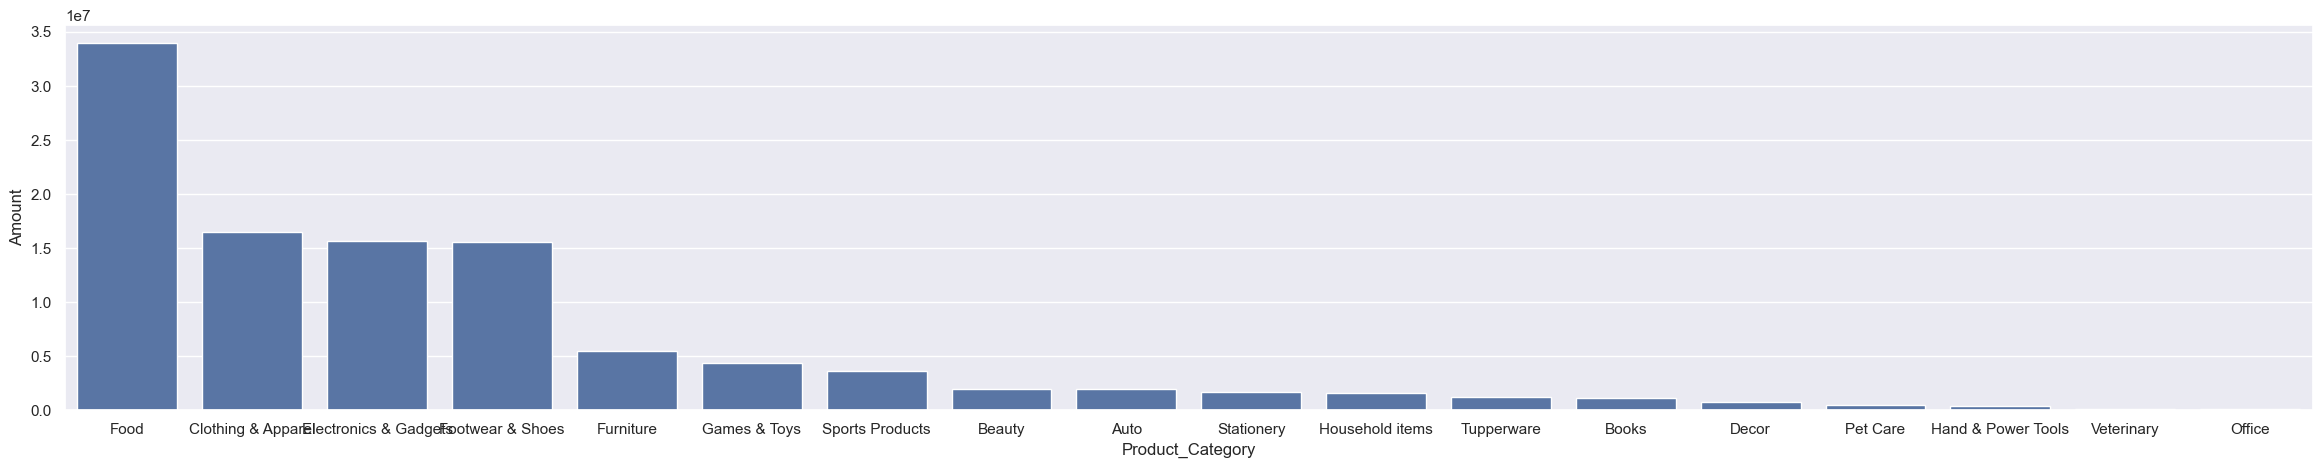

In [45]:
sns.set_theme(rc={'figure.figsize':(29,5)})

product_data = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=product_data, x='Product_Category', y='Amount')

In [46]:
### MOST OF THE PURCHASE IS FROM FOOD, CLOTHING AND ELECTRONICS, FOOTWERES 

<Axes: xlabel='Product_ID', ylabel='Orders'>

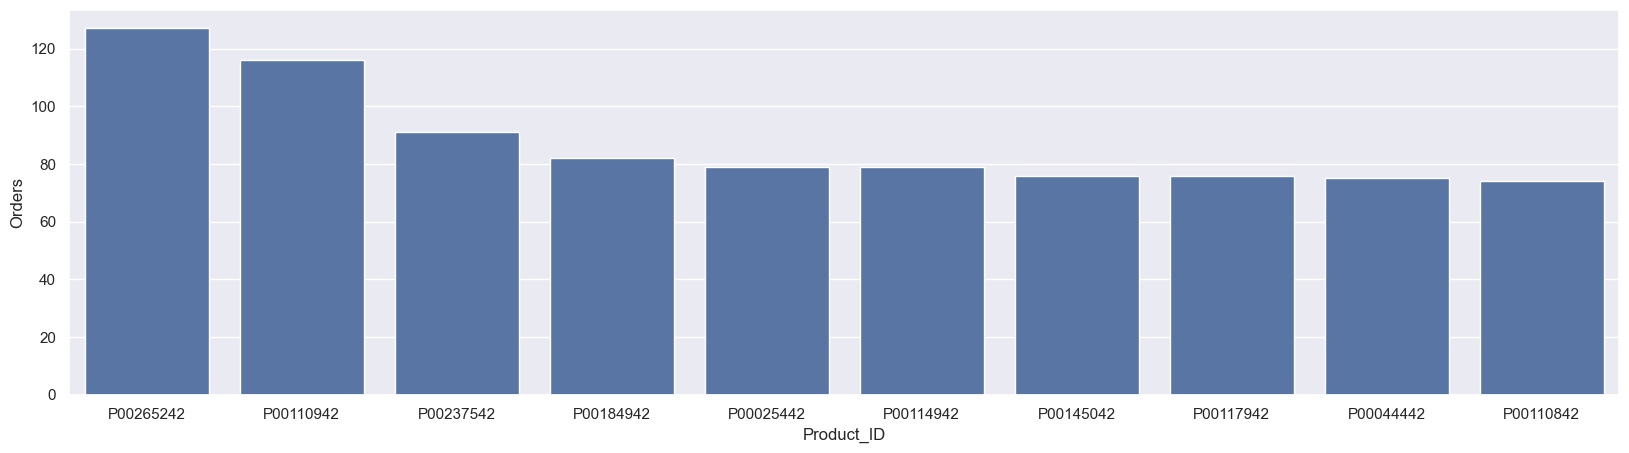

In [52]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_ID', y='Orders')

<Axes: xlabel='Product_ID'>

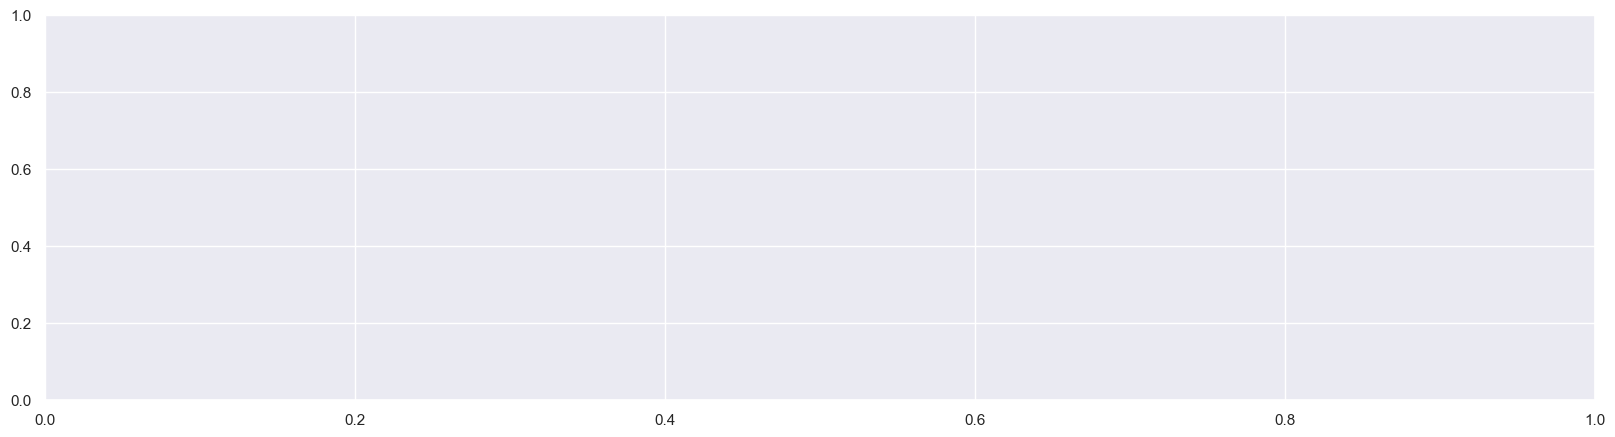

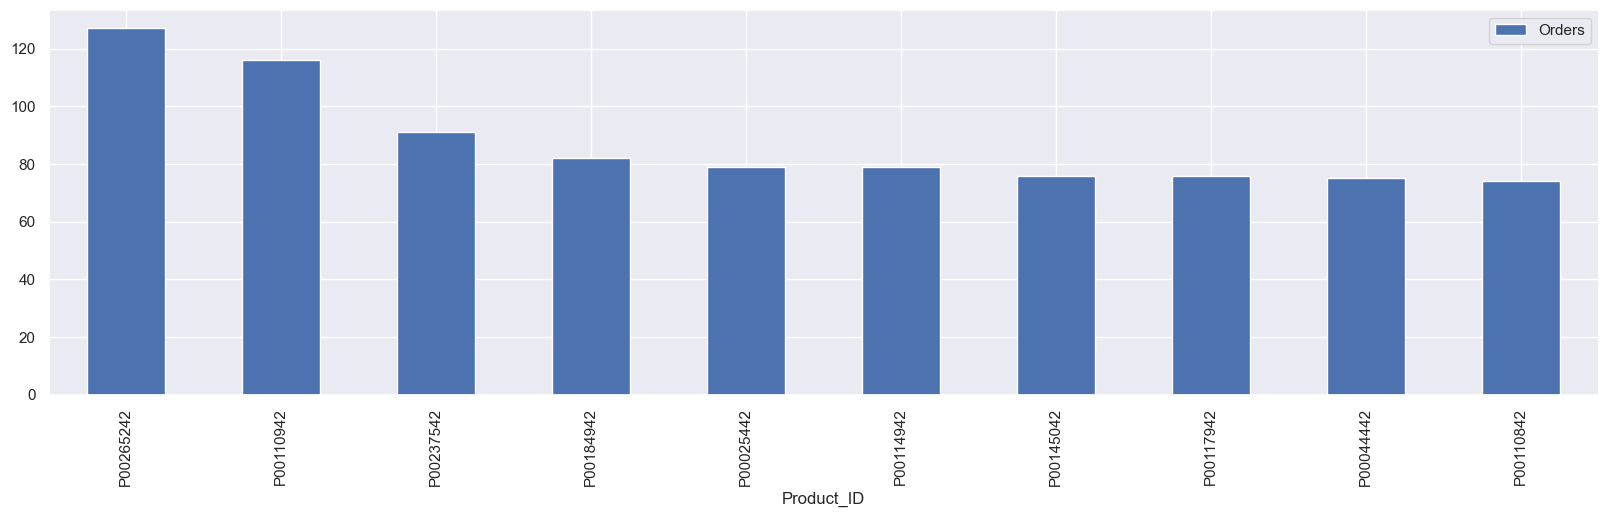

In [62]:
plt.subplots(figsize=(20,5))
df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10).plot(kind='bar', x='Product_ID', y='Orders')